# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

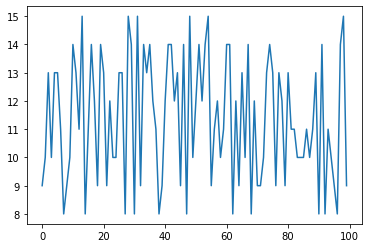

In [8]:
df["國文"].plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

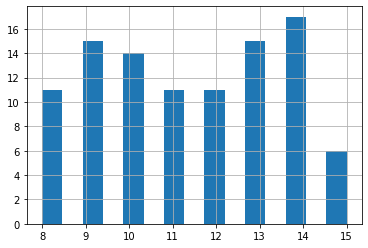

In [9]:
df["國文"].hist(bins=15) #bins調整間隔

## 3 一些基本的資料分析

算平均。

In [10]:
df["國文"].mean()

11.39

算標準差。

In [11]:
df["國文"].std()

2.1968526614594834

不如就該算的都幫我們算算...

In [12]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [13]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [14]:
df["國文"].corr(df["英文"])

0.16015801596684315

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [16]:
df["總級分"] = df.sum(axis=1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [18]:
df["加權"] = df["國文"] + df["英文"] + df["數學"]*2

In [19]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [20]:
df.sort_values("總級分", ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [21]:
df_sorted = df.sort_values(["加權","總級分"], ascending=False)
df_sorted.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
44,童心怡,13,13,14,8,13,61,54
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
4,崔靜成,13,12,14,12,13,64,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】重設 index

In [22]:
df_sorted.index = range(1,101)
df_sorted.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [23]:
df_sorted[df_sorted["數學"]==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [24]:
df_sorted[(df_sorted["數學"]==15) & (df_sorted["英文"]==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [25]:
df_sorted.drop("總級分", axis=1).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [26]:
df_sorted.drop("總級分", axis=1, inplace=True)
df_sorted.head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [27]:
df_sorted.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


In [28]:
df_sorted

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [29]:
a = df_sorted[df_sorted["姓名"]=="李士賢"].index
a

Int64Index([5], dtype='int64')

In [30]:
df_sorted.drop(a).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [31]:
conda install pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas_datareader as pdr
df2 = pdr.get_data_yahoo('AAPL')

In [33]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [34]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.369453
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.300648
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.910419
2017-08-23,40.117500,39.720001,39.767502,39.994999,77596400.0,37.957878
2017-08-24,40.185001,39.637501,40.107498,39.817501,79275600.0,37.789406


#### 只要最後 300 個交易日!

In [35]:
df2 = df2[-300:]
df2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,125.219666
2021-06-11,127.440002,126.099998,126.529999,127.349998,53522400.0,126.450912
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.558823
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.724762
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.231140
...,...,...,...,...,...,...
2022-08-11,170.990005,168.190002,170.059998,168.490005,57149200.0,168.490005
2022-08-12,172.169998,169.399994,169.820007,172.100006,67946400.0,172.100006
2022-08-15,173.389999,171.350006,171.520004,173.190002,54091700.0,173.190002


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

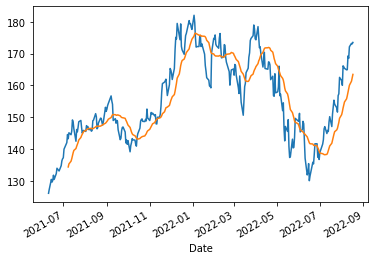

In [36]:
df2["Close"].plot()
df2["Close"].rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

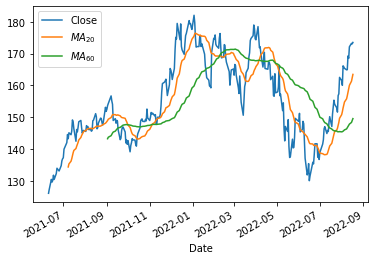

In [37]:
df2["Close"].plot(legend=True)
df2["Close"].rolling(20).mean().plot(label="$MA_{20}$", legend=True)
df2["Close"].rolling(60).mean().plot(label="$MA_{60}$", legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [38]:
closedata = df2["Close"]
len(closedata)

300

In [39]:
X = closedata[:-1] 
len(X)

299

In [40]:
Y = closedata[1:]
len(Y)

299

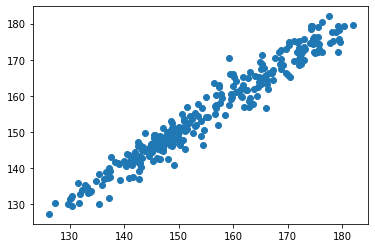

In [41]:
fig, ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [42]:
mydata = np.random.random((4,3))

In [43]:
mydata

array([[0.79275405, 0.2204587 , 0.89221193],
       [0.58697034, 0.19347768, 0.75327851],
       [0.19077214, 0.70472832, 0.96613103],
       [0.97870795, 0.64752703, 0.9540513 ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [44]:
df3 = pd.DataFrame(mydata, columns=list("ABC"))
df3

,A,B,C
0,0.792754,0.220459,0.892212
1,0.586970,0.193478,0.753279
2,0.190772,0.704728,0.966131
3,0.978708,0.647527,0.954051


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [45]:
df4 = pd.DataFrame(np.random.random((3,3)), columns=list("ABC"))
df4

,A,B,C
0,0.091483,0.693989,0.076865
1,0.988424,0.881072,0.974193
2,0.356577,0.615094,0.003867


In [46]:
df5 = pd.concat([df3,df4],axis=0)
df5

,A,B,C
0,0.792754,0.220459,0.892212
1,0.586970,0.193478,0.753279
2,0.190772,0.704728,0.966131
3,0.978708,0.647527,0.954051
0,0.091483,0.693989,0.076865
1,0.988424,0.881072,0.974193
2,0.356577,0.615094,0.003867


前面我們弄得亂七八糟的 index 重設一下。

In [47]:
df5.reset_index(drop=True)

,A,B,C
0,0.792754,0.220459,0.892212
1,0.586970,0.193478,0.753279
2,0.190772,0.704728,0.966131
3,0.978708,0.647527,0.954051
4,0.091483,0.693989,0.076865
5,0.988424,0.881072,0.974193
6,0.356577,0.615094,0.003867


#### 横向的貼

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [48]:
df6 = pd.concat([df3,df4],axis=1)
df6

,A,B,C,A,B,C
0,0.792754,0.220459,0.892212,0.091483,0.693989,0.076865
1,0.586970,0.193478,0.753279,0.988424,0.881072,0.974193
2,0.190772,0.704728,0.966131,0.356577,0.615094,0.003867
3,0.978708,0.647527,0.954051,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [49]:
df_names = pd.read_csv("data/names.csv", names=["姓名"]) #names將header新增到DataFrame中
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [50]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)), columns=['國文','英文','數學','社會','自然'])
df_grades.head()

,國文,英文,數學,社會,自然
0,15,14,9,15,9
1,8,6,10,9,6
2,12,7,14,14,15
3,6,7,9,10,10
4,14,11,12,15,12


In [51]:
df_final = pd.concat([df_names,df_grades], axis=1)
df_final.head()

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,14,9,15,9
1,王紹尹,8,6,10,9,6
2,黃季坤,12,7,14,14,15
3,許正書,6,7,9,10,10
4,張鈞蓮,14,11,12,15,12
